In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def showImage(data):
    some_article = data #Selecting the image
    some_article_image = some_article.reshape(28, 28)#Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [4]:
filePath_train_set = '/cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'
filePath_train_label = '/cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'
filePath_test_set = '/cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'

In [5]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
    trainLabel = np.frombuffer(trainLbpath.read(),
                               dtype=np.uint8, offset =8)
    
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
    trainSet = np.frombuffer(trainSetpath.read(),dtype=np.uint8, 
                             offset=16).reshape(len(trainLabel),784)
    
with gzip.open(filePath_test_label, 'rb') as testLbpath:
    testLabel = np.frombuffer(testLbpath.read(), 
                              dtype=np.uint8, offset=8)
    
with gzip.open(filePath_test_set, 'rb') as testSetpath:
    testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                           offset=16).reshape(len(testLabel),784)

In [6]:
X_train = trainSet
y_train = trainLabel
X_test = testSet
y_test = testLabel

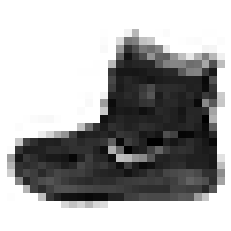

In [7]:
showImage(X_train[0])

In [8]:
len(testSet)

10000

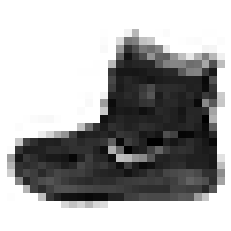

In [9]:
showImage(X_train[0])

In [10]:
y_train[0]

9

In [11]:
np.random.seed(42)

In [12]:
shuffle_index= np.random.permutation(60000)

In [13]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
#using Softmax Regression (multi-class classification problem)

log_clf = LogisticRegression(multi_class="multinomial",
                            solver="lbfgs", C=10,
                             random_state=42)

# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm

In [20]:
log_clf.fit(X_train_scaled, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_train_predict = log_clf.predict(X_train[0].reshape(1,-1))

In [22]:
y_train[0]

8

In [23]:
y_train_predict[0]

8

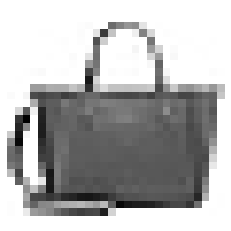

In [24]:
showImage(X_train[0])

In [25]:
y_train_predict = log_clf.predict(X_train_scaled)

In [26]:
log_accuracy = accuracy_score(y_train, y_train_predict)

In [27]:
log_precision = precision_score(y_train, y_train_predict, 
                                average='weighted')

In [28]:
log_recall  = recall_score(y_train, y_train_predict, 
                                average='weighted')

In [29]:
log_f1_score = f1_score(y_train, y_train_predict, 
                                average='weighted')

In [30]:
print(log_accuracy)
print(log_precision)
print(log_recall)
print(log_f1_score)

0.8775333333333334
0.876648632278309
0.8775333333333334
0.8769281105807729


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rnd_clf = RandomForestClassifier(n_estimators=20, 
                                 max_depth=10,
                                random_state=42)

In [33]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1,-1))

In [35]:
y_train[0]

8

In [36]:
y_train_predict[0]

8

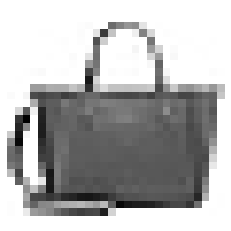

In [37]:
showImage(X_train[0])

In [38]:
y_train_predict = rnd_clf.predict(X_train)

In [39]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, 
                                average='weighted')
rnd_recall  = recall_score(y_train, y_train_predict, 
                                average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, 
                                average='weighted')

In [40]:
print(rnd_accuracy)
print(rnd_precision)
print(rnd_recall)
print(rnd_f1_score)

0.8766666666666667
0.8784075869648036
0.8766666666666667
0.875054729413325


In [41]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
def display_scores(scores):
    print(scores)
    print(scores.mean())
    print(scores.std())

In [44]:
log_clf = LogisticRegression(multi_class="multinomial",
                            solver="lbfgs", C=10, 
                            random_state=42)

In [45]:
log_cv_scores = cross_val_score(log_clf, X_train_scaled,
                               y_train, cv=3, 
                                scoring="accuracy")
display_scores(log_cv_scores)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

[0.84905 0.84825 0.84395]
0.8470833333333333
0.0022395436042987695


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
log_cv_accuracy = log_cv_scores.mean()

In [47]:
y_train_pred = cross_val_predict(log_clf,X_train_scaled, 
                                 y_train,cv=3)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [48]:
confusion_matrix(y_train, y_train_pred)
log_cv_precision =  precision_score(y_train, y_train_pred,
                                   average="weighted")
log_cv_recall = recall_score(y_train, y_train_pred,
                                   average="weighted")
log_cv_f1_score = f1_score(y_train, y_train_pred,
                                   average="weighted")

In [49]:
print(log_cv_accuracy)
print(log_cv_precision)
print(log_cv_recall)
print(log_cv_f1_score)

0.8470833333333333
0.8458694883855286
0.8470833333333333
0.846272242627941


In [50]:
rnd_clf = RandomForestClassifier(n_estimators=20, 
                                 max_depth=10,
                                random_state=42)

In [52]:
rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train,
                               cv =3 , scoring="accuracy")
display_scores(rnd_cv_scores)

[0.85155 0.84745 0.84585]
0.8482833333333334
0.002400462918318523


In [53]:
rnd_cv_accuracy = rnd_cv_scores.mean()

In [54]:
y_train_pred = cross_val_predict(rnd_clf, X_train, y_train,
                                cv = 3)

In [55]:
confusion_matrix(y_train, y_train_pred)

array([[5081,    2,  108,  334,   45,    5,  358,    0,   67,    0],
       [  18, 5691,   57,  199,    8,    1,   21,    0,    5,    0],
       [  39,    2, 4439,   59, 1098,    0,  325,    0,   38,    0],
       [ 147,   18,   65, 5444,  195,    0,  117,    0,   14,    0],
       [   9,    7,  493,  339, 4842,    1,  283,    0,   25,    1],
       [   1,    0,    2,    2,    0, 5502,    0,  351,   32,  110],
       [1195,    8,  831,  198,  709,    2, 2947,    0,  110,    0],
       [   0,    0,    0,    0,    0,   88,    0, 5538,   12,  362],
       [  12,    5,   48,   31,   35,   16,   50,   20, 5777,    6],
       [   1,    0,    2,    4,    2,   52,    1,  290,   12, 5636]])

In [56]:
rnd_cv_precision =  precision_score(y_train, y_train_pred,
                                   average="weighted")
rnd_cv_recall = recall_score(y_train, y_train_pred,
                                   average="weighted")
rnd_cv_f1_score = f1_score(y_train, y_train_pred,
                                   average="weighted")

In [57]:
print(rnd_cv_accuracy)
print(rnd_cv_precision)
print(rnd_cv_recall)
print(rnd_cv_f1_score)

0.8482833333333334
0.8482875291253137
0.8482833333333333
0.8452574403288833


In [71]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("log_cv_accuracy:", log_cv_accuracy)
print("log_cv_precision:", log_cv_precision)
print("log_cv_recall:", log_cv_recall)
print("log_cv_f1_score:", log_cv_f1_score)

print("=== Random Forest === ")
display_scores(rnd_cv_scores)
print("rnd_cv_accuracy:", rnd_cv_accuracy)
print("rnd_cv_precision:", rnd_cv_precision)
print("rnd_cv_recall :", rnd_cv_recall )
print("rnd_cv_f1_score:", rnd_cv_f1_score)

=== Softmax === 
[0.84905 0.84825 0.84395]
0.8470833333333333
0.0022395436042987695
log_cv_accuracy: 0.8470833333333333
log_cv_precision: 0.8458694883855286
log_cv_recall: 0.8470833333333333
log_cv_f1_score: 0.846272242627941
=== Random Forest === 
[0.85155 0.84745 0.84585]
0.8482833333333334
0.002400462918318523
rnd_cv_accuracy: 0.8482833333333334
rnd_cv_precision: 0.8482875291253137
rnd_cv_recall : 0.8482833333333333
rnd_cv_f1_score: 0.8452574403288833


In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=0.99)

In [78]:
X_train_reduced = pca.fit_transform(X_train)

In [81]:
len(pca.components_)

459

In [82]:
np.sum(pca.explained_variance_ratio_)

0.9900347820630977

In [83]:
X_train_recovered  = pca.inverse_transform(X_train_reduced)

In [85]:
def plot_digits(instances, image_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), image_per_row)
    images = [instances.reshape(size,size) for instances in instances]
    n_rows = (len(instances)-1) // image_per_row + 1
    row_images = []
    n_empty = n_rows * image_per_row - len(instances)
    images.append(np.zeros((size,size  *  n_empty)))
    for  row in range(n_row):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages,  axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
    plt.figure(figsize=(7, 4))
    plt.subplot(121)
    # Plotting 'original' image
    plot_digits(X_train[::2100])
    plt.title("Original", fontsize=16)
    plt.subplot(122)
    # Plotting the corresponding 'recovered' image
    plot_digits(X_train_recovered[::2100])
    plt.title("Compressed", fontsize=16)
    plt.show()

In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [96]:
log_clf_ens = LogisticRegression(multi_class="multinomial", 
                                 solver="lbfgs", C=5)

In [97]:
rnd_clf_ens = RandomForestClassifier(n_estimators=20,
                                    max_depth=10, 
                                     random_state=42)

In [98]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15]
    }
]

In [99]:
voting_clf_grid_search = VotingClassifier(
                estimators=[('lr', log_clf_ens),
                           ('rf', rnd_clf_ens)],
                            voting='soft')

In [100]:
grid_search = GridSearchCV(voting_clf_grid_search, 
                           param_grid, cv=3, 
                          scoring='neg_mean_squared_error')

In [101]:
grid_search.fit(X_train_reduced, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

GridSearchCV(cv=3, error_score=nan,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=5,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='multinomial',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                         

In [102]:
grid_search.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                        

In [103]:
grid_search.best_params_

{'lr__C': 5,
 'lr__multi_class': 'multinomial',
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [104]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], 
                              cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.3714651532819442 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}
